<a href="https://colab.research.google.com/github/tszabad/FCC_dataanalytics/blob/master/fertility_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

from IPython.display import clear_output

print(tf.__version__)

     |████████████████████████████████| 1.0MB 4.1MB/s 
2.4.1


In [85]:
dataset_path = "/content/fertility_Diagnosis.txt"
dataset = pd.read_table(dataset_path, sep=",", header=None, names = ["Season", "Age", "Disease", "Accident", "Surgery", "Feaver", "Alcohol_consumption", "Smoking", "Siting", "Output"])
dataset["Output"] = dataset["Output"].apply(lambda x: 1 if x=='N' else 0 )
dataset.head()

,Season,Age,Disease,Accident,Surgery,Feaver,Alcohol_consumption,Smoking,Siting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,1
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,0
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,1
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,1
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,0


In [86]:
dataset.isna().sum()


Season                 0
Age                    0
Disease                0
Accident               0
Surgery                0
Feaver                 0
Alcohol_consumption    0
Smoking                0
Siting                 0
Output                 0
dtype: int64

In [87]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

#sns.pairplot(train_dataset[["Season", "Age", "Disease", "Accident", "Surgery", "Feaver", "Alcohol_consumption", "Smoking", "Siting", "Output"]], diag_kind="kde")

In [88]:
train_labels = train_dataset.pop('Output')
test_labels = test_dataset.pop('Output')

def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model
  
model = build_model()

In [89]:
EPOCHS = 10
model.fit(train_dataset, train_labels, 
                    epochs=EPOCHS)

Epoch 1/10
3/3 [==============================] - 1s 4ms/step - loss: 4.1704 - accuracy: 0.1352
Epoch 2/10
3/3 [==============================] - 0s 3ms/step - loss: 1.2585 - accuracy: 0.1648
Epoch 3/10
3/3 [==============================] - 0s 3ms/step - loss: 1.0480 - accuracy: 0.1859
Epoch 4/10
3/3 [==============================] - 0s 4ms/step - loss: 0.8892 - accuracy: 0.3195
Epoch 5/10
3/3 [==============================] - 0s 2ms/step - loss: 0.7375 - accuracy: 0.4711
Epoch 6/10
3/3 [==============================] - 0s 3ms/step - loss: 0.6231 - accuracy: 0.6008
Epoch 7/10
3/3 [==============================] - 0s 3ms/step - loss: 0.5331 - accuracy: 0.7375
Epoch 8/10
3/3 [==============================] - 0s 3ms/step - loss: 0.4785 - accuracy: 0.7352
Epoch 9/10
3/3 [==============================] - 0s 3ms/step - loss: 0.4373 - accuracy: 0.8391
Epoch 10/10
3/3 [==============================] - 0s 3ms/step - loss: 0.3935 - accuracy: 0.8609


In [93]:
loss, accuracy = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} output".format(accuracy))

1/1 - 0s - loss: 0.2964 - accuracy: 0.9000
Testing set Mean Abs Error:  0.90 output


In [94]:
test_predictions = model.predict(test_dataset).flatten()



In [96]:
test_predictions = pd.Series(test_predictions)
for i in range(20):

  print(test_predictions.iloc[i])
  print(test_labels.iloc[i])

0.5353736
1
1.0300598
1
0.4241863
1
0.5322399
1
1.061925
1
1.026437
1
0.79377466
1
0.8789903
1
0.6953784
1
0.7449492
1
0.73360085
1
0.8001872
1
0.8192709
1
0.8191944
1
0.72663075
0
1.1437953
1
1.0833457
1
1.0365657
1
1.0469787
1
0.5661692
1


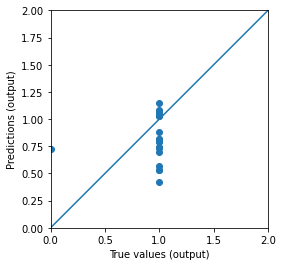

In [97]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (output)')
plt.ylabel('Predictions (output)')
lims = [0, 2]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)